# Census Income
This is a Sci-Kit Learn + Pandas example of classification problem. The dataset comes from http://archive.ics.uci.edu/. 

Data extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)). The data was also preprocessed for the purpose of this example.

Prediction task is to determine whether a person makes over 50K a year.


### List of attributes:

##### Features
- age: continuous. 
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, - 10th, Doctorate, 5th-6th, Preschool. 
- education-num: continuous. 
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
- sex: Female, Male. 
- hours-per-week: continuous. 
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



##### Labels
- income - >50K, <=50K. 

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [ ]:
# Uncomment this if you are using Google Colab
!wget https://raw.githubusercontent.com/PrzemekSekula/DeepLearningClasses1/master/LogisticRegressionCensus/census.csv

--2020-11-18 08:03:22--  https://raw.githubusercontent.com/PrzemekSekula/DeepLearningClasses1/master/LogisticRegressionCensus/census.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3152687 (3.0M) [text/plain]
Saving to: ‘census.csv’

census.csv          100%[===================>]   3.01M  --.-KB/s    in 0.09s   

2020-11-18 08:03:23 (33.4 MB/s) - ‘census.csv’ saved [3152687/3152687]



### Load dataset

In [ ]:
df = pd.read_csv("./census.csv")

print (df.shape)
print (df.columns)
df.head()

(32561, 12)
Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'hours-per-week',
       'native-country', 'income'],
      dtype='object')


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


## Task 1 - Initial analysis
Perform initial analysis to understand the data.

In [ ]:
df.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [ ]:
df.income.value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [ ]:
df['income'].replace({"<=50K": 0, ">50K": 1}, inplace=True)
df.rename(columns={"income": "over50k-income"}, inplace=True)
df['over50k-income'].value_counts()

0    24720
1     7841
Name: over50k-income, dtype: int64

In [ ]:
df.race.value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [ ]:
df.race.replace({"Amer-Indian-Eskimo": 0,
                "Black": 0,
                "Asian-Pac-Islander": 0,
                "Other": 0,
                "White": 1}, inplace=True)

df.rename(columns={"race": "race-white"}, inplace=True)

df['race-white'].value_counts()

1    27816
0     4745
Name: race-white, dtype: int64

In [ ]:
df.sex.value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [ ]:
df.sex.replace({"Male": 1,
                "Female": 0}, inplace=True)

df.rename(columns={"sex": "sex-male"}, inplace=True)

df['sex-male'].value_counts()

1    21790
0    10771
Name: sex-male, dtype: int64

In [ ]:
df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [ ]:
df.workclass.replace({"Never-worked": "?", "Without-pay": "?"}, inplace=True)
df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1857
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Name: workclass, dtype: int64

In [ ]:
df.education.value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [ ]:
df.education.replace({"Preschool": "Preschool-6th", 
                      "1st-4th": "Preschool-6th", 
                      "5th-6th": "Preschool-6th"}, inplace=True)
df.education.value_counts()

HS-grad          10501
Some-college      7291
Bachelors         5355
Masters           1723
Assoc-voc         1382
11th              1175
Assoc-acdm        1067
10th               933
7th-8th            646
Prof-school        576
Preschool-6th      552
9th                514
12th               433
Doctorate          413
Name: education, dtype: int64

In [ ]:
df['marital-status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64

In [ ]:
df['marital-status'].replace({"Married-AF-spouse": "Married", 
                              "Married-civ-spouse": "Married"}, inplace=True)
df['marital-status'].value_counts()

Married                  14999
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Name: marital-status, dtype: int64

In [ ]:
df.occupation.value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [ ]:
df.occupation.replace({"Armed-Forces": "Other-service", 
                      "Priv-house-serv": "Other-service",
                       "?": "Other-service"}, inplace=True)
df.occupation.value_counts()

Other-service        5296
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Name: occupation, dtype: int64

In [ ]:
df.relationship.value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [ ]:
df['native-country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [ ]:
df['native-country'].replace(['Mexico','?', 'Cambodia', 'England', 'Puerto-Rico', 'Canada', 'Germany', 'Outlying-US(Guam-USVI-etc)', 'India', 'Japan', 'Greece', 'South', 'China', 'Cuba', 'Iran', 'Honduras', 'Philippines', 'Italy', 'Poland', 'Jamaica', 'Vietnam', 'Portugal', 'Ireland', 'France', 'Dominican-Republic', 'Laos', 'Ecuador', 'Taiwan', 'Haiti', 'Columbia', 'Hungary', 'Guatemala', 'Nicaragua', 'Scotland', 'Thailand', 'Yugoslavia', 'El-Salvador', 'Trinadad&Tobago', 'Peru', 'Hong', 'Holand-Netherlands'], 0, inplace=True)
df['native-country'].replace('United-States',1, inplace=True)
df.rename(columns={"native-country": "country-USA"}, inplace=True)
df['country-USA'].value_counts()
#omggggggggg
#df['native-country'].replace({not "United-States": "Not-US"}, inplace=True)
#protip -> [kolumna]=='us'.astype(int)

1    29170
0     3391
Name: country-USA, dtype: int64

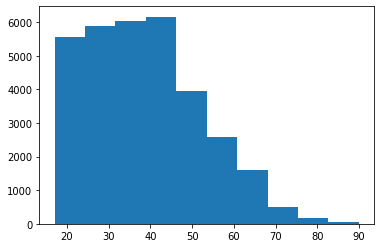

In [ ]:
df.age.hist(grid=False)
df['education-num'].hist(grid=False)
df['hours-per-week'].hist(grid=False)

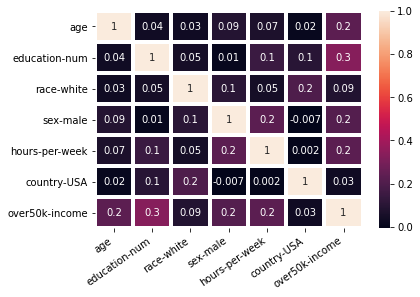

In [ ]:
import seaborn as sns

# calculate the correlation matrix
corr = df.corr()

# plot the heatmap
hm = sns.heatmap(corr,
                 annot=True,
                 fmt='.1g',
                 #vmin=0,
                 #vmax=1,
                 #center=0.5,
                 #cmap=sns.color_palette("ch:s=-.2,r=.6"),
                 linewidths=3,
                 linecolor='white')

hm.set_xticklabels(hm.get_xticklabels(),
                    rotation=35,
                    horizontalalignment='right');

## Task 2 - Preparing data
- Select features `X` and labels `y`. Make sure that your selection makes sense.
- Change the data into a numerical form to let your algorithm (logistic regression) deal with them
- Perform One-hot encoding if necessary
- Split your data into train and test subsets. Make sure that your split is reasonable. Use `stratify` if you consider it helpful.

In [ ]:
y = df['over50k-income']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: over50k-income, dtype: int64

In [ ]:
X = df[['workclass','marital-status','race-white','sex-male','occupation','country-USA']]
X.head()
X = pd.get_dummies(X, columns=['workclass','marital-status','occupation'])
X.head()
#Train set accuracy: 0.821048321048321
#Test set accuracy: 0.8212750276378823

,race-white,sex-male,country-USA,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,marital-status_Divorced,marital-status_Married,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Adm-clerical,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
#X = df[['workclass','marital-status','race-white','sex-male','occupation']]
#X.head()
#X = pd.get_dummies(X, columns=['workclass','marital-status','occupation'])
#X.head()
#Train set accuracy: 0.8205978705978706
#Test set accuracy: 0.820292347377472

#X = df[['workclass','marital-status','race-white','sex-male','education','country-USA']]
#X.head()
#X = pd.get_dummies(X, columns=['workclass','marital-status','education'])
#X.head()
#Train set accuracy: 0.8235872235872236
#Test set accuracy: 0.8210293575727797
#początki overfittingu

#X = df[['workclass','marital-status','race-white','sex-male','occupation','relationship']]
#X.head()
#X = pd.get_dummies(X, columns=['workclass','marital-status','occupation','relationship'])
#X.head()
#Train set accuracy: 0.8209664209664209
#Test set accuracy: 0.820292347377472

#X = df[['marital-status','race-white','sex-male','education','country-USA']]
#X.head()
#X = pd.get_dummies(X, columns=['marital-status','education'])
#X.head()
#Train set accuracy: 0.8210892710892711
#Test set accuracy: 0.8177128116938951

#X = df[['hours-per-week','marital-status','race-white','sex-male','education','country-USA']]
#X.head()
#X = pd.get_dummies(X, columns=['marital-status','education'])
#X.head()
#Train set accuracy: 0.8202702702702702
#Test set accuracy: 0.8210293575727797

#X = df[['hours-per-week','marital-status','race-white','sex-male','occupation','country-USA']]
#X.head()
#X = pd.get_dummies(X, columns=['marital-status','occupation'])
#X.head()
#Train set accuracy: 0.81998361998362
#Test set accuracy: 0.8221348728657413

## Task 4 - Logistic Regression
Train and test a logistic regression model. If you want to get a maximum score you must be sure that your model:
- Do not overfit
- Do not underfit
- Achieves at least 80% accuracy on the test subset.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state=1)

print ("X train:", X_train.shape)
print ("y train:", y_train.shape)
print ("X test:", X_test.shape)
print ("y test:", y_test.shape)

X train: (24420, 28)
y train: (24420,)
X test: (8141, 28)
y test: (8141,)


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

print('Po treningu, można już zjeść Snickersa')

Po treningu, można już zjeść Snickersa


In [ ]:
print ("Train set accuracy:", model.score(X_train, y_train))
print ("Test set accuracy:", model.score(X_test, y_test))

Train set accuracy: 0.821048321048321
Test set accuracy: 0.8212750276378823


## Task 5 - Precision and recall
- Compute precision and recall for your model, for both, train and test subsets.
- Make sure that you understand these metrics, you may be asked to explain the meaning of it.

In [ ]:
#Precision
from sklearn.metrics import precision_score

testowe=model.predict(X_test)
treningowe = model.predict(X_train)

test_precision = precision_score(y_test, testowe)
train_precision = precision_score(y_train, treningowe)

print("Wartość PRECISION dla następujących zbiorów danych:\ndla testowego: ",test_precision, "\ndla treningowego: ", train_precision)

Wartość PRECISION dla następujących zbiorów danych:
dla testowego:  0.6534954407294833 
dla treningowego:  0.6556769008860499


In [ ]:
#Recall
from sklearn.metrics import recall_score

test_recall = recall_score(y_test, testowe)
train_recall = recall_score(y_train, treningowe)

print("Wartość RECALL dla następujących zbiorów danych:\ndla testowego: ",test_recall, "\ndla treningowego: ", train_recall)

Wartość RECALL dla następujących zbiorów danych:
dla testowego:  0.548469387755102 
dla treningowego:  0.5410644448223091


## Task 6: Applying the model
Use your model to check if you will earn above 50,000$ per year. Check both the response from the model (true/false) and the probability that the response will be true. Check using the data about yourself:
- right now
- two years from now
- ten years from now

In [ ]:
madzia = [[1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0], #white, non-male,workclass_?,never-married
          [1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0], #to samo, tylko workclass_self emp inc, prof specialty
          [1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0]] #to samo tylko married

madzia_df = pd.DataFrame(madzia,columns=X.columns)
wynik=model.predict(madzia_df)  
print(wynik)       

[0 0 1]


In [ ]:
p=model.predict_proba(madzia_df)
print("Prawdopodobieństwo wyrzucenia przez model danej etykiety (odpowiednio dla 0 i 1):\n",p)

Prawdopodobieństwo wyrzucenia przez model danej etykiety (odpowiednio dla 0 i 1):
 [[0.96566358 0.03433642]
 [0.91318364 0.08681636]
 [0.34697834 0.65302166]]
